In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare_titanic

In [2]:
df = pd.DataFrame(acquire.get_data_from_mysql())

Type in your queryselect*from passengers
Name the databasetitanic_db


In [3]:
df, LE, train, test = prepare_titanic.process_data(df)

In [11]:
# age and fare need scale
train.age.value_counts(dropna = False)

0.271174    172
0.371701     22
0.296306     22
0.258608     21
0.447097     21
0.346569     21
0.233476     20
0.220910     20
0.308872     17
0.359135     16
0.396833     15
0.434531     15
0.321438     14
0.384267     14
0.195778     14
0.334004     13
0.421965     13
0.283740     13
0.246042     12
0.409399     11
0.208344     11
0.484795     11
0.472229     10
0.560191      9
0.585323      9
0.044986      9
0.522493      9
0.019854      8
0.497361      8
0.597889      7
           ... 
0.710983      2
0.886906      2
0.158080      2
0.403116      2
0.736115      2
0.723549      2
0.057552      2
0.070118      2
0.685851      2
0.572757      2
0.761247      2
0.120382      2
0.428248      1
0.453380      1
1.000000      1
0.132948      1
0.290023      1
0.692134      1
0.811510      1
0.004147      1
0.786378      1
0.145514      1
0.880623      1
0.003141      1
0.006283      1
0.176929      1
0.924604      1
0.660719      1
0.824076      1
0.000000      1
Name: age, Length: 84, d

In [31]:
train.info()
# age,embarked, embarked need process
# deck need to be droppedb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 329 to 510
Data columns (total 12 columns):
passenger_id    712 non-null int64
survived        712 non-null int64
pclass          712 non-null int64
sex             712 non-null object
age             712 non-null float64
sibsp           712 non-null int64
parch           712 non-null int64
fare            712 non-null float64
embarked        712 non-null int64
class           712 non-null object
embark_town     712 non-null object
alone           712 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 72.3+ KB


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

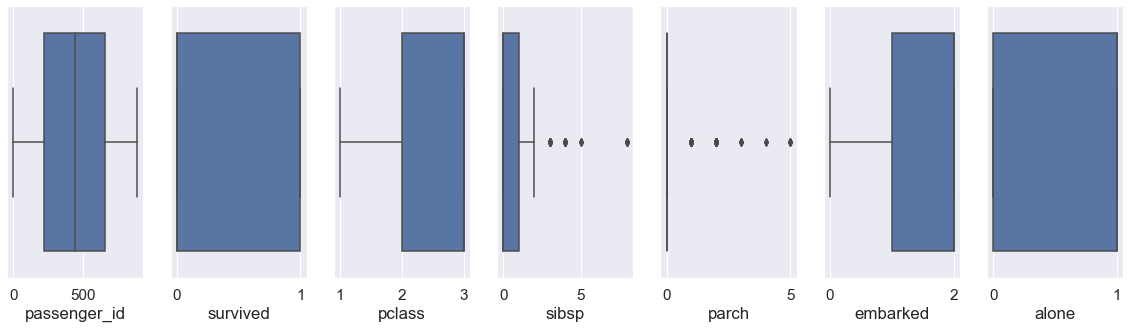

In [34]:
features = train.select_dtypes(include = "int").columns
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(20,5))
sns.set(font_scale=1.4)

for i, feature in enumerate(features):  
    #plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    #series = train[col]  
    #plt.subplot(4, 4, plot_number)
    #plt.title(feature)
    sns.boxplot(feature,data=train, ax=ax[i])
    
    
#_, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

# survival_rate = train.survived.mean()
# features = train.select_dtypes(include = "object").columns
# for i, feature in enumerate(features):
#     sns.barplot(feature, 'survived', data=df, ax=ax[i], alpha=.5)
#     ax[i].set_ylabel('Survival Rate')
#     ax[i].axhline(survival_rate, ls='--', color='grey')
# plt.show()

In [11]:
features = train.select_dtypes(include = "object").columns
features

Index(['sex', 'class', 'embark_town'], dtype='object')

In [12]:
def plot_all_numeric(df, target):
    features = list(df.columns[(df.dtypes == float) | (df.nunique()<5)])
    
    for i, feature in enumerate(features):
        sns.boxplot(feature,target,data=df)
        plt.show()

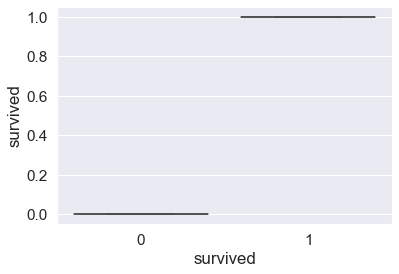

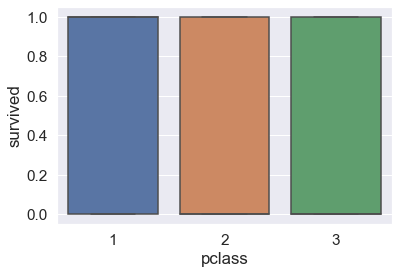

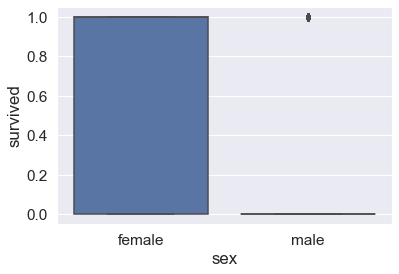

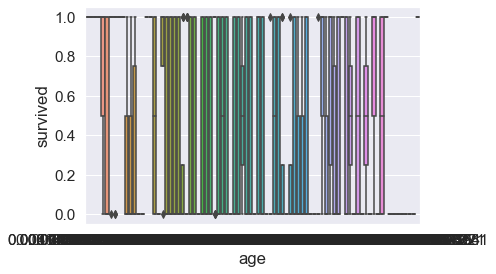

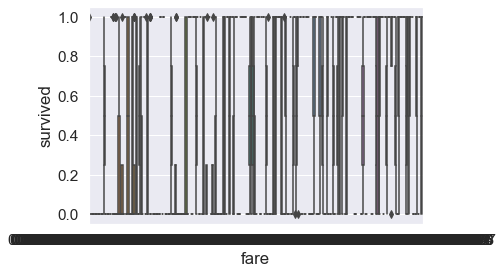

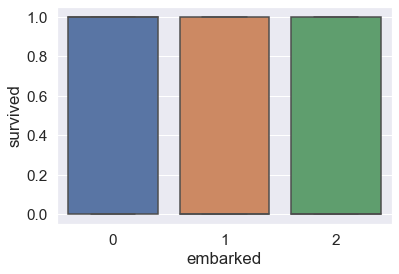

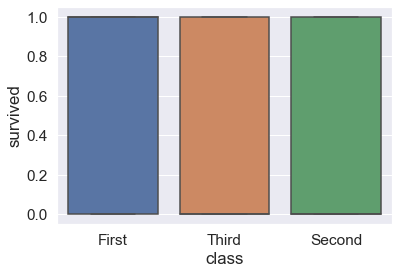

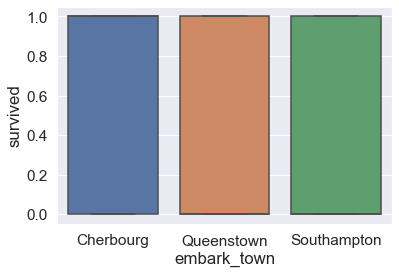

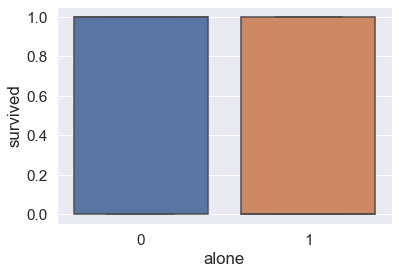

In [13]:
plot_all_numeric(train, "survived")

In [14]:
def loopy_graphs(df, target):
    features = list(df.columns[(df.dtypes == object) | (df.nunique()<5)])
    
    pop_rate = df[target].mean()
    for i, feature in enumerate(features):
        sns.barplot(feature,target,data=df,alpha=.6)
        plt.show()

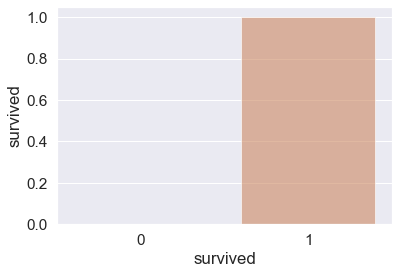

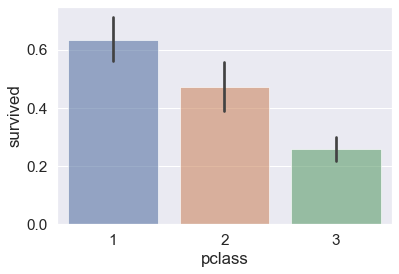

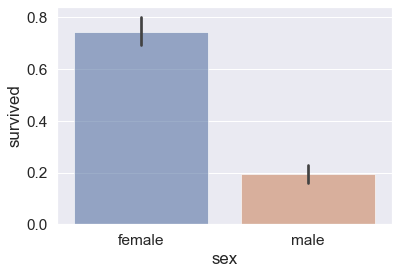

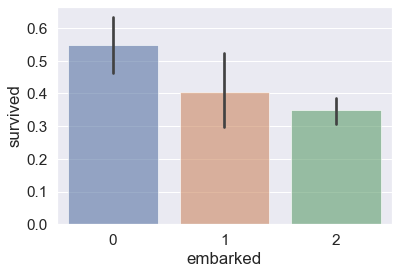

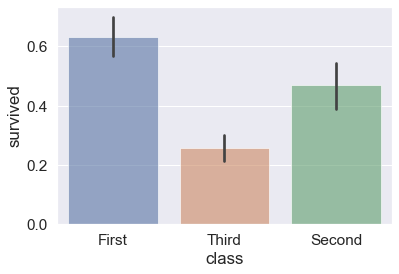

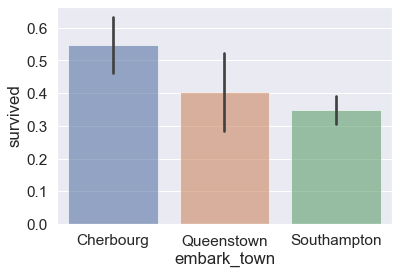

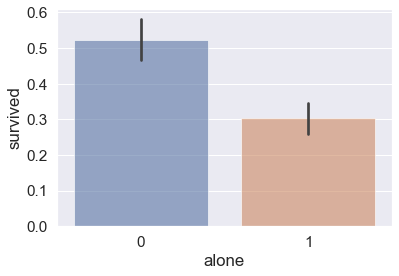

In [15]:
loopy_graphs(train, "survived")

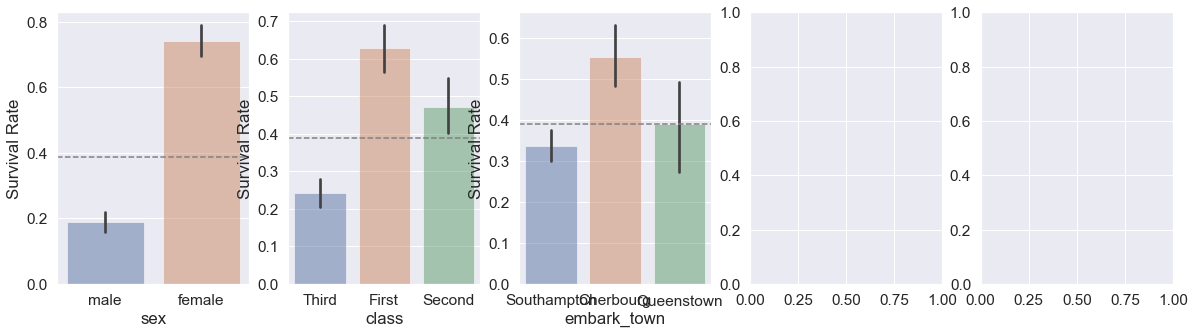

In [16]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

survival_rate = train.survived.mean()
features = train.select_dtypes(include = "object").columns
for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=df, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')
plt.show()

In [17]:
plt.figure(figsize=(25, 25))

for i, col in enumerate(['taxvaluedollarcnt', 'bathroomcnt', 'bedroomcnt',\
       'calculatedfinishedsquarefeet', 'garagecarcnt', 'garagetotalsqft',\
       'roomcnt', 'unitcnt', 'yearbuilt', 'lotsizesquarefeet']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = numerical[col]  
    plt.subplot(4, 3, plot_number)
    plt.title(col)
    series.hist(density=False, cumulative=False, log=False)

NameError: name 'numerical' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(25, 25))
gs = gridspec.GridSpec(4, 3)
sns.set(font_scale=1.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, -1])
ax4 = plt.subplot(gs[1: , :])

sns.violinplot(x="tenure_years", y="total_charges", data=df, ax = ax1)
sns.boxplot(x="tenure_years", y="total_charges", data=df, ax = ax2)
sns.barplot(x="tenure_years", y="total_charges", data=df, ax = ax3)
sns.heatmap(df.corr(),cmap='Blues',annot=True, ax = ax4)
#sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})